# SVC Application

As an example of how you can use an SVM to solve a complex problem, this notebook presents a way to take a handwriting recognition task and solve it using a nonlinear kernel. The model learns from a dataset offered in the Sklearn library itself here from the MNIST database. 

It contains a series of grayscale images of handwritten numbers ranging from 1 to 9 with a resolution of 8x8 pixels. This is a simple problem compared to the many problems of resolve image recognition engines.

In [38]:
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from matplotlib.pyplot import figure

In [39]:
digits = load_digits()
X, y = digits.data, digits.target

Random display of some samples:

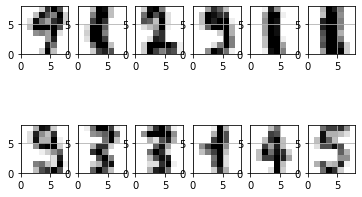

In [40]:
random_examples = [random.randint(0, len(digits.images)) for i in range(12)]

for n, number in enumerate(random_examples):
  plt.subplot(2, 6, n+1)
  plt.imshow(digits.images[number], 
             cmap='binary',
             #interpolation='none',
             extent=[0, 8, 0, 8])
  plt.grid()
plt.show()

[[ -1.25946717  21.27488244]
 [  7.95761118 -20.76869901]
 [  6.99192279  -9.95598243]
 ...
 [ 10.80128116  -6.96025155]
 [ -4.87210149  12.42396901]
 [ -0.34439001   6.36554775]]
[[ -1.25946981  21.27488437]
 [  7.95760592 -20.76869664]
 [  6.99192887  -9.95598904]
 ...
 [ 10.80128381  -6.96025236]
 [ -4.87209876  12.42395433]
 [ -0.34438442   6.36554722]]


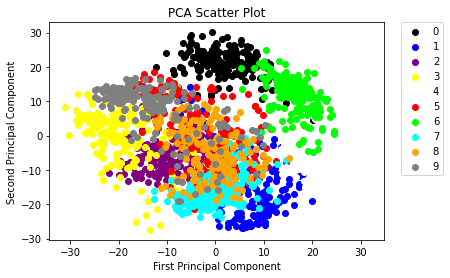

In [41]:
from sklearn.decomposition import PCA
# Create a Randomized PCA model that takes two components
randomized_pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
print(reduced_data_rpca)
print(reduced_data_pca)

colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y_bis = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y_bis, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

#### Modelization

The code begins with the adoption of an SVM with nonlinear noayu. To check the usefulness of the representation we use the accuracy score

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

print(X_train.shape, X_test.shape)

(1347, 64) (450, 64)


In [43]:
from sklearn.svm import SVC

svm = SVC()
cv_perf = cross_val_score(svm, X_train, y_train, cv=10)
test_perf = svm.fit(X_train, y_train).score(X_test, y_test)

print('Cross-validation accuracy score :  %0.4f, test accuracy score : %0.4f' % (np.mean(cv_perf), test_perf))

Cross-validation accuracy score :  0.9866, test accuracy score : 0.9889


In [30]:
from sklearn.model_selection import GridSearchCV

svc = SVC(random_state=42)
param = [
         {
          'kernel' : ['rbf'], 
          'C' : [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
         }]

svc_grid_rbf = GridSearchCV(svc,
                        param_grid=param,
                        refit=True,
                        cv=3,
                        verbose=2)

svc_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.001, gamma=

[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ........................C=100, gamma=10, kernel=rbf; total time=   0.7s
[CV] END ........................C=100, gamma=10, kernel=rbf; total time=   0.5s
[CV] END ........................C=100, gamma=10, kernel=rbf; total time=   0.5s
[CV] END .......................C=100, gamma=100, kernel=rbf; total time=   1.1s
[CV] END .......................C=100, gamma=100, kernel=rbf; total time=   0.7s
[CV] END .......................C=100, gamma=100, kernel=rbf; total time=   0.7s


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             verbose=2)

In [31]:
print('Best parameters for rbf kernel: %s' % str(svc_grid_rbf.best_params_))
cv_perf_rbf = svc_grid_rbf.best_score_
test_perf_rbf = svc_grid_rbf.score(X_test, y_test)

print('Rbf kernel Cross-validation accuracy score: %0.4f, Rbf kernel test accuracy score: %0.4f' % (cv_perf_rbf, test_perf_rbf))

Best parameters for rbf kernel: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Rbf kernel Cross-validation accuracy score: 0.9852, Rbf kernel test accuracy score: 0.9911


In [27]:
svc = SVC(kernel='poly',random_state=42)
param = [
         {
          'C' : [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
          'degree':[3,10],
          'coef0':[0]
         }]

svc_grid_poly = GridSearchCV(svc,
                        param_grid=param,
                        #refit=True,
                        cv=3,
                        verbose=2)

svc_grid_poly.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END ............C=0.001, coef0=0, degree=3, gamma=0.001; total time=   0.2s
[CV] END ............C=0.001, coef0=0, degree=3, gamma=0.001; total time=   0.2s
[CV] END ............C=0.001, coef0=0, degree=3, gamma=0.001; total time=   0.1s
[CV] END .............C=0.001, coef0=0, degree=3, gamma=0.01; total time=   0.2s
[CV] END .............C=0.001, coef0=0, degree=3, gamma=0.01; total time=   0.2s
[CV] END .............C=0.001, coef0=0, degree=3, gamma=0.01; total time=   0.2s
[CV] END ..............C=0.001, coef0=0, degree=3, gamma=0.1; total time=   0.1s
[CV] END ..............C=0.001, coef0=0, degree=3, gamma=0.1; total time=   0.1s
[CV] END ..............C=0.001, coef0=0, degree=3, gamma=0.1; total time=   0.1s
[CV] END ................C=0.001, coef0=0, degree=3, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=3, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degr

[CV] END .................C=0.1, coef0=0, degree=10, gamma=1; total time=   0.1s
[CV] END ................C=0.1, coef0=0, degree=10, gamma=10; total time=   0.1s
[CV] END ................C=0.1, coef0=0, degree=10, gamma=10; total time=   0.1s
[CV] END ................C=0.1, coef0=0, degree=10, gamma=10; total time=   0.1s
[CV] END ...............C=0.1, coef0=0, degree=10, gamma=100; total time=   0.1s
[CV] END ...............C=0.1, coef0=0, degree=10, gamma=100; total time=   0.1s
[CV] END ...............C=0.1, coef0=0, degree=10, gamma=100; total time=   0.1s
[CV] END ................C=1, coef0=0, degree=3, gamma=0.001; total time=   0.2s
[CV] END ................C=1, coef0=0, degree=3, gamma=0.001; total time=   0.2s
[CV] END ................C=1, coef0=0, degree=3, gamma=0.001; total time=   0.2s
[CV] END .................C=1, coef0=0, degree=3, gamma=0.01; total time=   0.1s
[CV] END .................C=1, coef0=0, degree=3, gamma=0.01; total time=   0.1s
[CV] END .................C=

[CV] END ..............C=100, coef0=0, degree=10, gamma=0.01; total time=   0.3s
[CV] END ...............C=100, coef0=0, degree=10, gamma=0.1; total time=   0.1s
[CV] END ...............C=100, coef0=0, degree=10, gamma=0.1; total time=   0.1s
[CV] END ...............C=100, coef0=0, degree=10, gamma=0.1; total time=   0.1s
[CV] END .................C=100, coef0=0, degree=10, gamma=1; total time=   0.1s
[CV] END .................C=100, coef0=0, degree=10, gamma=1; total time=   0.1s
[CV] END .................C=100, coef0=0, degree=10, gamma=1; total time=   0.1s
[CV] END ................C=100, coef0=0, degree=10, gamma=10; total time=   0.1s
[CV] END ................C=100, coef0=0, degree=10, gamma=10; total time=   0.1s
[CV] END ................C=100, coef0=0, degree=10, gamma=10; total time=   0.1s
[CV] END ...............C=100, coef0=0, degree=10, gamma=100; total time=   0.0s
[CV] END ...............C=100, coef0=0, degree=10, gamma=100; total time=   0.1s
[CV] END ...............C=10

GridSearchCV(cv=3, estimator=SVC(kernel='poly', random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'coef0': [0],
                          'degree': [3, 10],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}],
             verbose=2)

In [29]:
print('Best parameters for polynomial kernel: %s' % str(svc_grid_poly.best_params_))
cv_perf_poly = svc_grid_poly.best_score_
test_perf_poly = svc_grid_poly.score(X_test, y_test)

print('Poly kernel Cross-validation accuracy score: %0.4f, Poly kernel test accuracy score: %0.4f' % (cv_perf_poly, test_perf_poly))

Best parameters for polynomial kernel: {'C': 0.01, 'coef0': 0, 'degree': 3, 'gamma': 0.1}
Poly kernel Cross-validation accuracy score: 0.9829, Poly kernel test accuracy score: 0.9911


In [47]:
svc = SVC(kernel='sigmoid',random_state=42)
param = [
         {
          'C' : [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
          'coef0':[0,1,10]
         }]

svc_grid_sig = GridSearchCV(svc,
                        param_grid=param,
                        #refit=True,
                        cv=3,
                        verbose=2)

svc_grid_sig.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END ......................C=0.001, coef0=0, gamma=0.001; total time=   0.2s
[CV] END ......................C=0.001, coef0=0, gamma=0.001; total time=   0.2s
[CV] END ......................C=0.001, coef0=0, gamma=0.001; total time=   0.2s
[CV] END .......................C=0.001, coef0=0, gamma=0.01; total time=   0.2s
[CV] END .......................C=0.001, coef0=0, gamma=0.01; total time=   0.2s
[CV] END .......................C=0.001, coef0=0, gamma=0.01; total time=   0.2s
[CV] END ........................C=0.001, coef0=0, gamma=0.1; total time=   0.3s
[CV] END ........................C=0.001, coef0=0, gamma=0.1; total time=   0.3s
[CV] END ........................C=0.001, coef0=0, gamma=0.1; total time=   0.4s
[CV] END ..........................C=0.001, coef0=0, gamma=1; total time=   0.2s
[CV] END ..........................C=0.001, coef0=0, gamma=1; total time=   0.2s
[CV] END ..........................C=0.001, co

[CV] END ..........................C=0.01, coef0=10, gamma=1; total time=   0.2s
[CV] END .........................C=0.01, coef0=10, gamma=10; total time=   0.2s
[CV] END .........................C=0.01, coef0=10, gamma=10; total time=   0.2s
[CV] END .........................C=0.01, coef0=10, gamma=10; total time=   0.2s
[CV] END ........................C=0.01, coef0=10, gamma=100; total time=   0.2s
[CV] END ........................C=0.01, coef0=10, gamma=100; total time=   0.1s
[CV] END ........................C=0.01, coef0=10, gamma=100; total time=   0.2s
[CV] END ........................C=0.1, coef0=0, gamma=0.001; total time=   0.2s
[CV] END ........................C=0.1, coef0=0, gamma=0.001; total time=   0.2s
[CV] END ........................C=0.1, coef0=0, gamma=0.001; total time=   0.2s
[CV] END .........................C=0.1, coef0=0, gamma=0.01; total time=   0.2s
[CV] END .........................C=0.1, coef0=0, gamma=0.01; total time=   0.2s
[CV] END ...................

[CV] END ..........................C=1, coef0=10, gamma=0.01; total time=   0.3s
[CV] END ...........................C=1, coef0=10, gamma=0.1; total time=   0.3s
[CV] END ...........................C=1, coef0=10, gamma=0.1; total time=   0.3s
[CV] END ...........................C=1, coef0=10, gamma=0.1; total time=   0.3s
[CV] END .............................C=1, coef0=10, gamma=1; total time=   0.1s
[CV] END .............................C=1, coef0=10, gamma=1; total time=   0.2s
[CV] END .............................C=1, coef0=10, gamma=1; total time=   0.1s
[CV] END ............................C=1, coef0=10, gamma=10; total time=   0.2s
[CV] END ............................C=1, coef0=10, gamma=10; total time=   0.2s
[CV] END ............................C=1, coef0=10, gamma=10; total time=   0.1s
[CV] END ...........................C=1, coef0=10, gamma=100; total time=   0.2s
[CV] END ...........................C=1, coef0=10, gamma=100; total time=   0.2s
[CV] END ...................

[CV] END ..........................C=100, coef0=1, gamma=100; total time=   0.2s
[CV] END .......................C=100, coef0=10, gamma=0.001; total time=   0.3s
[CV] END .......................C=100, coef0=10, gamma=0.001; total time=   0.3s
[CV] END .......................C=100, coef0=10, gamma=0.001; total time=   0.3s
[CV] END ........................C=100, coef0=10, gamma=0.01; total time=   0.3s
[CV] END ........................C=100, coef0=10, gamma=0.01; total time=   0.3s
[CV] END ........................C=100, coef0=10, gamma=0.01; total time=   0.3s
[CV] END .........................C=100, coef0=10, gamma=0.1; total time=   0.3s
[CV] END .........................C=100, coef0=10, gamma=0.1; total time=   0.3s
[CV] END .........................C=100, coef0=10, gamma=0.1; total time=   0.3s
[CV] END ...........................C=100, coef0=10, gamma=1; total time=   0.1s
[CV] END ...........................C=100, coef0=10, gamma=1; total time=   0.2s
[CV] END ...................

GridSearchCV(cv=3, estimator=SVC(kernel='sigmoid', random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'coef0': [0, 1, 10],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}],
             verbose=2)

In [48]:
print('Best parameters for sigmoid kernel: %s' % str(svc_grid_sig.best_params_))
cv_perf_sig = svc_grid_sig.best_score_
test_perf_sig = svc_grid_sig.score(X_test, y_test)

print('Sigmoid kernel Cross-validation accuracy score: %0.4f, Sigmoid kernel test accuracy score: %0.4f' % (cv_perf_sig, test_perf_sig))

Best parameters for sigmoid kernel: {'C': 10, 'coef0': 0, 'gamma': 0.01}
Sigmoid kernel Cross-validation accuracy score: 0.9725, Sigmoid kernel test accuracy score: 0.9822


In [52]:
print(svc_grid_rbf.get_params)

<bound method BaseEstimator.get_params of GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             verbose=2)>


The results are already excellent without the gridsaerchcv, we do not see a big difference. 

We can nevertheless observe the bad predictions made by our algorithms.

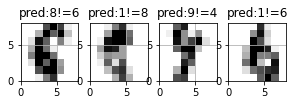

In [50]:
prediction = svc_grid_rbf.predict(X_test)
wrong = (prediction != y_test)
test_digits = scaling.inverse_transform(X_test)

for n,(number, yp, yt) in enumerate(zip(
  scaling.inverse_transform(X_test)[wrong],
  prediction[wrong],
  y_test[wrong])):
    plt.subplot(2, 5, n+1)
    plt.imshow(number.reshape((8, 8)), cmap='binary',
              interpolation='none',
              extent=[0, 8, 0, 8])
    plt.title('pred:' + str(yp) + "!=" + str(yt))
    plt.grid()
plt.show()

## Try SVM on bigger dataset

In [ ]:
from tensorflow.keras.datasets import mnist

(trainX, trainy), (testX, testy) = mnist.load_data()

In [ ]:
nsamples, nx, ny = trainX.shape
trainX = trainX.reshape((trainX.shape[0], nx*ny))
testX = testX.reshape((testX.shape[0], nx*ny))

In [ ]:
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(trainX)
X_train = scaling.transform(trainX)
X_test = scaling.transform(testX)

In [ ]:
svm = SVC()
cv_perf = cross_val_score(svm, X_train, trainy, cv=10)
test_perf = svm.fit(X_train, trainy).score(X_test, testy)

print('Cross-validation accuracy score :  %0.4f, test accuracy score : %0.4f' % (np.mean(cv_perf), test_perf))

In [ ]:
rfc = RandomForestClassifier()
cv_perf = cross_val_score(rfc, X_train, trainy, cv=10)
test_perf = rfc.fit(X_train, trainy).score(X_test, testy)

print('Cross-validation accuracy score :  %0.4f, test accuracy score : %0.4f' % (np.mean(cv_perf), test_perf))